C:\Users\THILAK R\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:40<00:00,  2.22it/s]


Epoch 1/10 | Train Loss: 0.8335, Train Acc: 0.6810, Val Loss: 0.6671, Val Acc: 0.7221


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:34<00:00,  2.62it/s]


Epoch 2/10 | Train Loss: 0.6244, Train Acc: 0.7520, Val Loss: 0.7080, Val Acc: 0.7276


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:33<00:00,  2.66it/s]


Epoch 3/10 | Train Loss: 0.5690, Train Acc: 0.7866, Val Loss: 0.5591, Val Acc: 0.7854


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:33<00:00,  2.65it/s]


Epoch 4/10 | Train Loss: 0.5200, Train Acc: 0.7980, Val Loss: 0.5457, Val Acc: 0.7758


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:33<00:00,  2.64it/s]


Epoch 5/10 | Train Loss: 0.4765, Train Acc: 0.8181, Val Loss: 0.4757, Val Acc: 0.8226


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:35<00:00,  2.52it/s]


Epoch 6/10 | Train Loss: 0.4701, Train Acc: 0.8216, Val Loss: 0.5068, Val Acc: 0.8143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:41<00:00,  2.16it/s]


Epoch 7/10 | Train Loss: 0.4064, Train Acc: 0.8432, Val Loss: 0.5258, Val Acc: 0.8047


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [01:15<00:00,  1.17it/s]


Epoch 8/10 | Train Loss: 0.3890, Train Acc: 0.8502, Val Loss: 0.4718, Val Acc: 0.8308


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [01:15<00:00,  1.18it/s]


Epoch 9/10 | Train Loss: 0.3520, Train Acc: 0.8661, Val Loss: 0.4935, Val Acc: 0.8212


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [01:14<00:00,  1.19it/s]


Epoch 10/10 | Train Loss: 0.3137, Train Acc: 0.8827, Val Loss: 0.4478, Val Acc: 0.8446


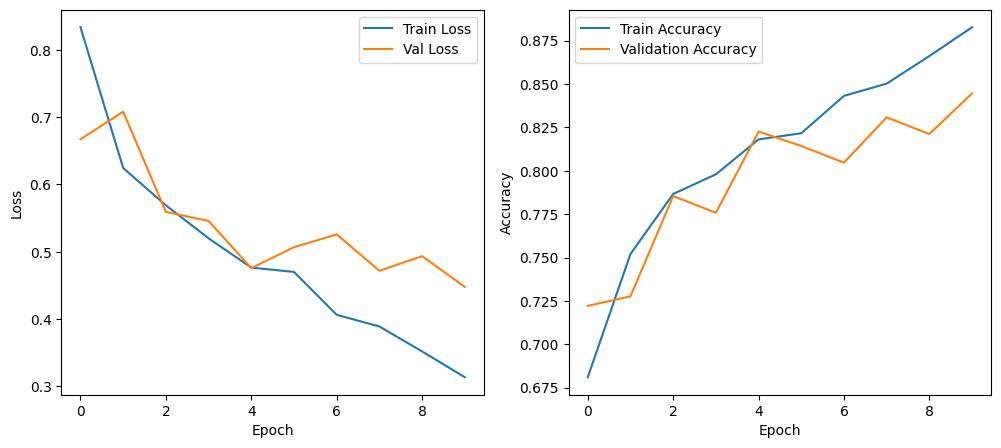

C:\Users\THILAK R\AppData\Local\Temp\ipykernel_14392\4152363542.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


                precision    recall  f1-score   support

        Severe       0.68      0.85      0.75        93
Proliferate_DR       0.83      0.58      0.69       189
         No_DR       0.97      0.99      0.98       313
      Moderate       0.66      0.70      0.68        81
          Mild       0.58      0.78      0.67        63

      accuracy                           0.82       739
     macro avg       0.74      0.78      0.75       739
  weighted avg       0.83      0.82      0.82       739



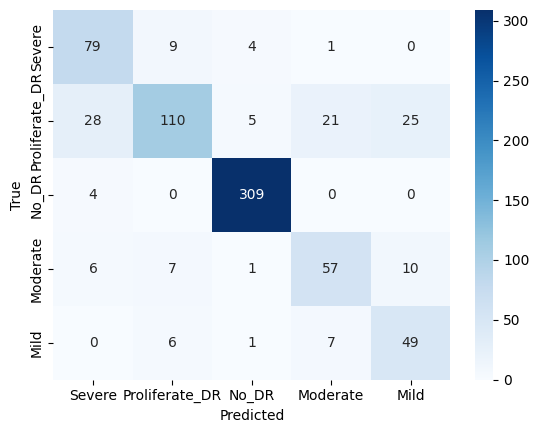

ValueError: multi_class must be in ('ovo', 'ovr')

In [10]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import psutil

# Paths
dataset_path = r'C:\Users\THILAK R\Downloads\DR_dataset\gaussian_filtered_images\gaussian_filtered_images'
base_dir = './processed_dataset'
os.makedirs(base_dir, exist_ok=True)

# Prepare dataset by selecting 150 images per class
classes = ["Severe", "Proliferate_DR", "No_DR", "Moderate", "Mild"]
for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    selected_images = random.sample(os.listdir(cls_path), 150)
    target_dir = os.path.join(base_dir, cls)
    os.makedirs(target_dir, exist_ok=True)
    for img in selected_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(target_dir, img))

# Split dataset into train, val, test (70%, 15%, 15%)
# Split dataset into train, val, test (70%, 15%, 15%)
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)
    train, temp = train_test_split(images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    for img, split in zip([train, val, test], ["train", "val", "test"]):  # Corrected line
        split_dir = os.path.join(base_dir, split, cls)
        os.makedirs(split_dir, exist_ok=True)
        for image in img:
            shutil.move(os.path.join(cls_dir, image), os.path.join(split_dir, image))


# Data transformations
transform = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Data loaders
batch_size = 32
data_dir = base_dir
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform['train'])
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform['val'])
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform['val'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(classes))
model = model.to(device)

# Training parameters
num_epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Training loop
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
best_val_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    train_loss = running_loss / total
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
    
    val_loss /= val_total
    val_acc = val_correct / val_total
    scheduler.step(val_loss)

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate on test set
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

all_labels, all_preds = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Classification report
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_preds, pos_label=1)
roc_auc = roc_auc_score(all_labels, all_preds)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
